# Import

In [65]:
from sklearn.datasets import make_classification
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math
import numpy as np
import statistics
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import pairwise_distances

## Sample size

In [66]:
sampleSize = int(input("enter sample size : "))


## Dataset generation

In [67]:
x,y = make_classification(
    n_samples=sampleSize,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_clusters_per_class=1,
    random_state=50,
    n_repeated=0,
    n_redundant=0
)

In [68]:
x_df = pd.DataFrame(data=x)
x_df.sample(5)

,0,1
7335,0.049968,-1.580383
7714,1.491236,0.314217
930,1.561806,1.405029
1479,1.835730,0.662060
8429,0.953824,0.560100


## PreProcessing

In [69]:
x_scaler = StandardScaler().fit_transform(x_df)
x_scaler = pd.DataFrame(data=x_scaler)
x_scaler.sample(5)

,0,1
6704,0.131322,-1.983335
8409,0.776042,0.433643
4537,-1.972902,-0.492227
9285,0.408086,2.050696
1697,0.607476,0.704546


## distance function 

In [70]:
calcuEuclideanDistance = lambda x1,x2,y1,y2: math.sqrt(math.pow((x1-x2),2)+math.pow((y1-y2),2))


## silhouette coefficient function 

In [71]:
def silhouette_coefficient(X, labels):

    n_samples = len(X)
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    # Calculate pairwise distance matrix
    distances = pairwise_distances(X)

    # Calculate average intra-cluster distances
    avg_intra_distances = np.zeros(n_samples)
    for i in range(n_clusters):
        mask = labels == unique_labels[i]
        avg_intra_distances[mask] = np.mean(distances[mask][:, mask], axis=1)

    # Calculate average inter-cluster distances
    avg_inter_distances = np.zeros(n_samples)
    for i in range(n_clusters):
        mask = labels != unique_labels[i]
        avg_inter_distances[mask] += np.sum(distances[mask][:, labels == unique_labels[i]], axis=1)
        avg_inter_distances[mask] /= np.sum(labels == unique_labels[i])

    # Calculate silhouette coefficients for each sample
    silhouette_scores = (avg_inter_distances - avg_intra_distances) / np.maximum(avg_inter_distances, avg_intra_distances)

    # Calculate the mean silhouette coefficient
    mean_silhouette = np.mean(silhouette_scores)

    return mean_silhouette


## Calculating the WCSS values and obtaining the silhouette_coefficient

In [72]:

# z=int(math.sqrt(sampleSize))
z=11
threshold=float(input("enter threshold value: "))

wcssPlot=[]
coeff=[]

for k in range(1,z):
  # random centroid choose
  centroidPoint=[]
  for i in range(k):
    val=random.randint(0,sampleSize-1)
    x=(x_scaler.iloc[val,0],x_scaler.iloc[val,1])
    centroidPoint.append(x)
  
  while True:
    newCentroid=[]
    distanceMatrix=[]
    for i in centroidPoint:
      tempDist=[]
      for j in range(sampleSize):
        tempDist.append(calcuEuclideanDistance(i[0],x_scaler.iloc[j,0],i[1],x_scaler.iloc[j,1]))
      distanceMatrix.append(tempDist)
    distanceMatrix_df=pd.DataFrame(data=distanceMatrix)
  
  
    assignedCluster=[]
    for i in range(sampleSize):
      assignedCluster.append((x_scaler.iloc[i,0],x_scaler.iloc[i,1],np.array(distanceMatrix_df.iloc[:,i]).argmin()))
    assignedCluster=pd.DataFrame(assignedCluster)
  
  
    for i in range(len(centroidPoint)):
      x_temp=[]
      y_temp=[]
      for j in range(sampleSize):
        if assignedCluster.iloc[j,2] == i:
          x_temp.append(x_scaler.iloc[j,0])
          y_temp.append(x_scaler.iloc[j,1])
      x_mean=statistics.mean(x_temp)
      y_mean=statistics.mean(y_temp)
      newCentroid.append((x_mean,y_mean))
  
    centroidPoint_df=pd.DataFrame(centroidPoint)
    newCentroid_df=pd.DataFrame(newCentroid)
  
    dist=[]
    for i in range(k):
      dist.append(calcuEuclideanDistance(centroidPoint_df.iloc[i,0],newCentroid_df.iloc[i,0],centroidPoint_df.iloc[i,1],newCentroid_df.iloc[i,1]))
      
    flag=True
    for i in dist:
      if i>threshold:
        flag=False
        break
    if flag == True:
      break
    centroidPoint=newCentroid
  
  # k-means-end
  nc=pd.DataFrame(newCentroid)
  ac=pd.DataFrame(assignedCluster)

  # wcss
  wcss=0
  for i in range(k+1):
    for j in range(sampleSize):
      if ac.iloc[j,2] == i:
        wcss = wcss + calcuEuclideanDistance(ac.iloc[j,0],nc.iloc[i,0],ac.iloc[j,1],nc.iloc[i,1])
  wcssPlot.append((wcss,k))
  # silhouette_coefficient
  coeff.append((silhouette_coefficient(ac.iloc[:,:2],ac.iloc[:,2]),k))

print("WCSS values : ",wcssPlot)
print("coefficient values : ",coeff)

  

WCSS values :  [(12783.74752107296, 1), (10627.497909146625, 2), (7107.349682692733, 3), (6487.25071666394, 4), (5619.6845757189385, 5), (5086.847359138933, 6), (4517.159337381002, 7), (4170.184913906394, 8), (4231.732360674429, 9), (3692.105018434672, 10)]
coefficient values :  [(-1.0, 1), (0.3053751506926765, 2), (0.5065032096586886, 3), (0.5895447609205011, 4), (0.698319991185668, 5), (0.4746393046687829, 6), (0.659146820994892, 7), (0.7013746216140502, 8), (0.6264567313410527, 9), (0.725633322151065, 10)]


## Elbow method Graph plotting

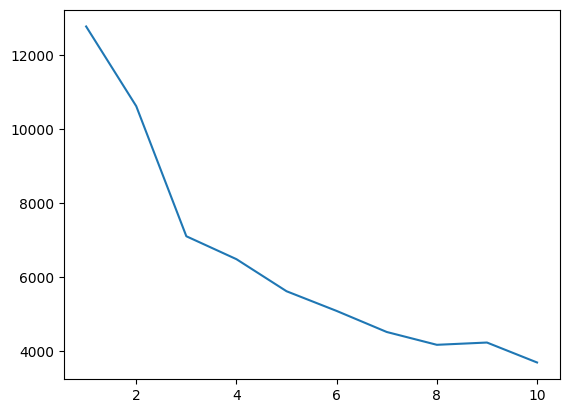

In [73]:
wcssPlot=pd.DataFrame(wcssPlot) 
plt.plot(wcssPlot.iloc[:,1], wcssPlot.iloc[:,0])

From the above graph of K-value v/s WCSS, we can find that the graph forms a elbow and the graph falls upto <b>k-value</b> 3. So, we choose 3 for th k-means clustering.

## silhouette coefficient

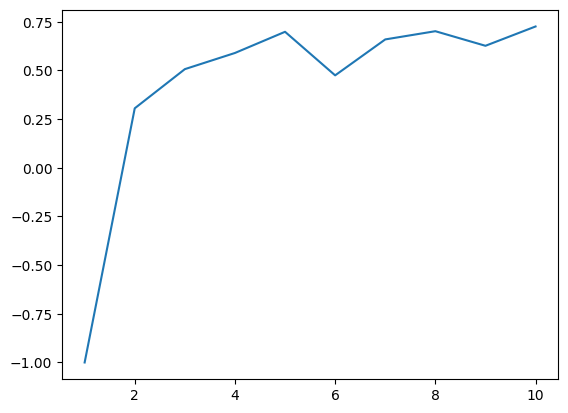

In [74]:
coeff=pd.DataFrame(coeff) 
plt.plot(coeff.iloc[:,1], coeff.iloc[:,0])

## Analysis

## Therefore k-means for the K-Value is 3

In [75]:
k=3

## Random Centroid Generation

In [76]:
import random
centroidPoint=[]
for i in range(k):
  val=random.randint(0,sampleSize)
  x=(x_scaler.iloc[val,0],x_scaler.iloc[val,1])
  centroidPoint.append(x)
centroidPoint

[(2.917768970870992, 1.0257589227477604),
 (-0.586275674480263, 0.8259226961518149),
 (-1.6348056098525374, 0.023045455001717764)]

## threshold value

In [77]:
threshold=float(input("enter threshold value: "))

```K means```

In [78]:
while True:
  distanceMatrix=[]
  for i in centroidPoint:
    tempDist=[]
    for j in range(sampleSize):
      tempDist.append(calcuEuclideanDistance(i[0],x_scaler.iloc[j,0],i[1],x_scaler.iloc[j,1]))
    distanceMatrix.append(tempDist)
  distanceMatrix_df=pd.DataFrame(data=distanceMatrix)


  assignedCluster=[]
  for i in range(sampleSize):
    assignedCluster.append((x_scaler.iloc[i,0],x_scaler.iloc[i,1],np.array(distanceMatrix_df.iloc[:,i]).argmin()))
  assignedCluster=pd.DataFrame(assignedCluster)


  newCentroid=[]
  for i in range(len(centroidPoint)):
    x_temp=[]
    y_temp=[]
    for j in range(sampleSize):
      if assignedCluster.iloc[j,2] == i:
        x_temp.append(x_scaler.iloc[j,0])
        y_temp.append(x_scaler.iloc[j,1])
    x_mean=statistics.mean(x_temp)
    y_mean=statistics.mean(y_temp)
    newCentroid.append((x_mean,y_mean))

  centroidPoint_df=pd.DataFrame(centroidPoint)
  newCentroid_df=pd.DataFrame(newCentroid)

  dist=[]
  for i in range(k):
    dist.append(calcuEuclideanDistance(centroidPoint_df.iloc[i,0],newCentroid_df.iloc[i,0],centroidPoint_df.iloc[i,1],newCentroid_df.iloc[i,1]))
  flag=True
  for i in dist:
    if i>threshold:
      flag=False
      break
  if flag == True:
    break
  centroidPoint=newCentroid


## Cluster Plotting

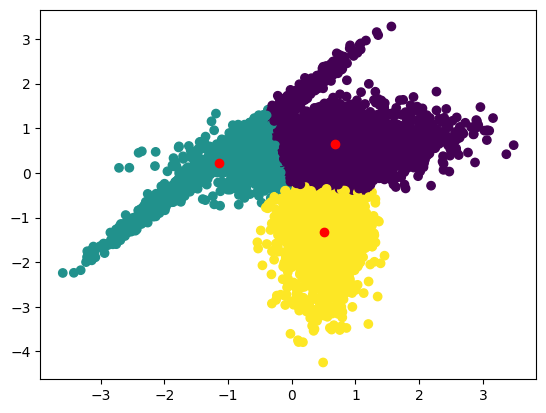

In [79]:
plt.scatter(assignedCluster.iloc[:,0],assignedCluster.iloc[:,1],c=assignedCluster.iloc[:,2])
plt.scatter(newCentroid_df.iloc[:,0],newCentroid_df.iloc[:,1],c="red")
plt.show()

## value of ```Silhouette coefficient```

In [80]:
coeff=silhouette_coefficient(ac.iloc[:,:2],ac.iloc[:,2])
print("The silhouette_coefficient is ", coeff)

The silhouette_coefficient is  0.725633322151065
